In [1]:
import sys
!{sys.executable} -m pip install pycaret

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evalml 0.28.0 requires graphviz>=0.13, but you have graphviz 0.8.4 which is incompatible.
evalml 0.28.0 requires imbalanced-learn>=0.8.0, but you have imbalanced-learn 0.7.0 which is incompatible.
evalml 0.28.0 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
evalml 0.28.0 requires pandas>=1.2.1, but you have pandas 1.0.5 which is incompatible.
evalml 0.28.0 requires scikit-learn>=0.24.0, but you have scikit-learn 0.23.2 which is incompatible.



  Using cached pycaret-2.3.2-py3-none-any.whl (263 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached kmodes-0.11.0-py2.py3-none-any.whl (18 kB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached mlflow-1.19.0-py3-none-any.whl (14.4 MB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached pandas_profiling-3.0.0-py2.py3-none-any.whl (248 kB)
  Using cached spacy-2.3.7-cp38-cp38-win_amd64.whl (9.7 MB)
  Using cached umap_learn-0.5.1-py3-none-any.whl
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished wit

In [1]:
import pycaret

In [2]:
# Initiallize the data and fuctioning : Once initialize press 'Y'
from pycaret.regression import *

In [3]:
import numpy as np # linear algebra

In [4]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
## Load Kc house price data
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
clf1 = setup(data = data, target = 'price')

,Description,Value
0,session_id,8375
1,Target,price
2,Original Data,"(21613, 21)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15129, 71)"


In [8]:
# Compare performance of the model through various regression model on various comparision metrics
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,63609.0444,13948466085.3621,117216.4888,0.8950,0.1651,0.1222,8.5320
xgboost,Extreme Gradient Boosting,69209.3797,15904351232.0000,125709.2453,0.8784,0.1765,0.1308,7.0200
lightgbm,Light Gradient Boosting Machine,67513.4534,16218318556.1087,126262.4757,0.8773,0.1726,0.1291,0.5040
rf,Random Forest Regressor,71008.7269,17372918163.0037,131364.8361,0.8679,0.1797,0.1335,15.9230
et,Extra Trees Regressor,71536.0485,17921908295.6714,132993.7964,0.8650,0.1807,0.1350,13.3840
gbr,Gradient Boosting Regressor,79681.4599,18099171831.1812,134186.4039,0.8617,0.1980,0.1542,4.3820
br,Bayesian Ridge,119125.5459,35820030917.8316,188786.8360,0.7289,0.3175,0.2345,0.1860
lasso,Lasso Regression,119071.0930,35850170368.0000,188882.3656,0.7286,0.3180,0.2341,0.6540
llar,Lasso Least Angle Regression,119001.0907,35847361851.0423,188874.8449,0.7286,0.3162,0.2339,0.0530
dt,Decision Tree Regressor,104020.4127,36821674554.9784,190953.9318,0.7216,0.2582,0.1922,0.3200


In [9]:
# Check Linear reg model's performance on 10 kfold CV 
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,172888.8906,68083097600.0000,260927.3750,0.5004,0.4132,0.3684
1,162012.6875,58245713920.0000,241341.4844,0.5055,0.4030,0.3484
2,172031.0938,66198249472.0000,257290.2031,0.5195,0.4073,0.3472
3,168343.2031,60144140288.0000,245243.0156,0.5216,0.4031,0.3439
4,172422.7188,76427640832.0000,276455.5000,0.5413,0.3988,0.3507
5,167223.4688,55402393600.0000,235377.1250,0.5526,0.4016,0.3441
6,172181.2188,64490217472.0000,253949.2344,0.4623,0.4200,0.3620
7,172185.6719,60871819264.0000,246722.1562,0.5124,0.4109,0.3616
8,167787.3750,56554344448.0000,237811.5781,0.4858,0.4128,0.3572
9,171576.3594,76739289088.0000,277018.5625,0.5162,0.4155,0.3486


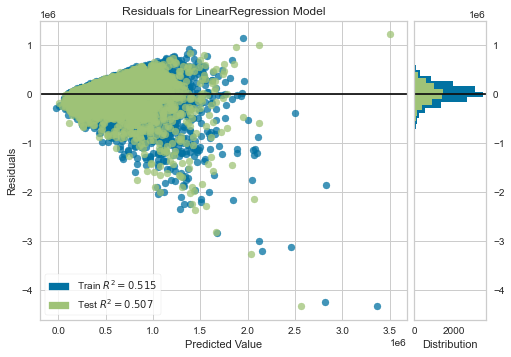

In [10]:
# Plot the model
plot_model(lr)

In [11]:
# ensembling Linear regression model (boosting)
lr_boosted = ensemble_model(lr, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,257464.3281,118705922048.0000,344537.2500,0.1288,0.8625,0.5687
1,240221.0625,101662121984.0000,318844.9688,0.1369,0.9801,0.5412
2,255337.8125,114284994560.0000,338060.6250,0.1704,0.9468,0.5597
3,247186.5938,106451337216.0000,326268.8125,0.1533,0.9507,0.5404
4,252823.0781,107476066304.0000,327835.4375,0.3549,0.9496,0.5569
5,253972.0156,105553502208.0000,324890.0000,0.1475,0.9074,0.5612
6,252675.6406,112640573440.0000,335619.6875,0.0609,0.8348,0.5525
7,259800.1562,113293959168.0000,336591.6875,0.0925,0.9124,0.5838
8,249949.7344,112226926592.0000,335002.8750,-0.0203,0.8862,0.5540
9,249533.4844,111184838656.0000,333443.9062,0.2990,0.9147,0.5503


In [12]:
# evaluate a model 
evaluate_model(lr_boosted)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [13]:
# generate predictions on holdout
lr_predictions_holdout = predict_model(lr_boosted)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,264967.5000,122431307776.0000,349901.8438,0.1297,0.9809,0.5827


In [14]:
# finalize model
lr_final = finalize_model(lr_boosted)